In [9]:
# !pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import arcpy
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


In [2]:
os.chdir("..") # return to the main directory
home_wd = os.getcwd()
home_wd

'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats'

In [3]:
in_cont = os.path.join(home_wd, r"shp\continents_borders.shp")
in_af = os.path.join(home_wd, r"shp\africa-states-borders.shp")
in_na = os.path.join(home_wd, r"shp\northamerica-states-borders.shp")
in_eu = os.path.join(home_wd, r"shp\europe-states-borders.shp")
in_as = os.path.join(home_wd, r"shp\asia-states-borders.shp")

out_cont = os.path.join(home_wd, r"geojson-continent-borders", "")
out_af = os.path.join(home_wd, r"geojson-africa-states", "")
out_na = os.path.join(home_wd, r"geojson-northamerica-states", "")
out_eu = os.path.join(home_wd, r"geojson-europe-states", "")
out_as = os.path.join(home_wd, r"geojson-asia-states", "")


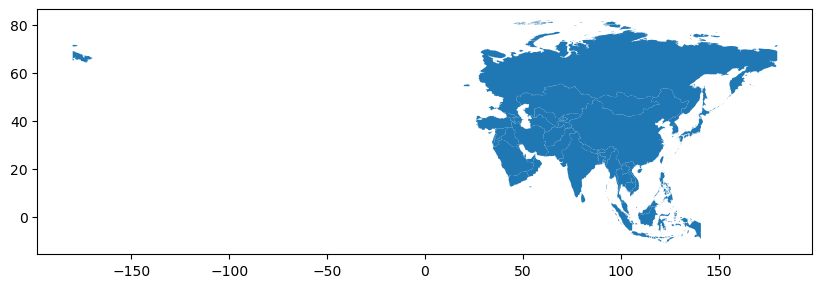

In [16]:
# Load the shapefile using GeoPandas
data = gpd.read_file(in_as)

# Plot the shapefile using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


In [17]:
arcpy.Exists(in_as)


True

In [18]:
flds = [str(f.name) for f in arcpy.ListFields(in_as)]
for idx, fld in enumerate(flds):
    print(idx, fld)

0 FID
1 Shape
2 SOVEREIGNT
3 LEVEL
4 TYPE
5 ADMIN
6 NAME
7 CONTINENT
8 NAME_EN


In [21]:
# Use a search cursor to iterate through the rows of the table and create a list of dictionaries

with arcpy.da.SearchCursor(in_as, flds) as cur:
    for row in cur:
        data.append(dict(zip(flds, row)), ignore_index=True)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df.head()


C:\Users\milan\AppData\Local\Temp\ipykernel_9648\2282178740.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(dict(zip(flds, row)), ignore_index=True)
C:\Users\milan\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\milan\AppData\Local\Temp\ipykernel_9648\2282178740.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(dict(zip(flds, row)), ignore_index=True)
C:\Users\milan\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\milan\AppData\Loc

,SOVEREIGNT,LEVEL,TYPE,ADMIN,NAME,CONTINENT,NAME_EN,geometry
0,Indonesia,2,Sovereign country,Indonesia,Indonesia,Asia,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,2,Sovereign country,Malaysia,Malaysia,Asia,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Cyprus,2,Sovereign country,Cyprus,Cyprus,Asia,Cyprus,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
3,India,2,Sovereign country,India,India,Asia,India,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
4,China,1,Sovereignty,China,China,Asia,People's Republic of China,"MULTIPOLYGON (((78.91769 33.38626, 78.91595 33..."


In [22]:
with arcpy.da.SearchCursor(in_as, flds) as cur:
    for row in cur:
        region_lst = [row[6]]
        id_lst = [row[0]]
        reg_id_dic = {k:v for k,v in zip(region_lst, id_lst)}
        for region in region_lst:
            field = arcpy.AddFieldDelimiters(in_as, "NAME")
            selection = "{field} = '{val}'".format(field=field, val=region)
            selected = arcpy.management.SelectLayerByAttribute(
                in_as, "NEW_SELECTION", selection)
            arcpy.conversion.FeaturesToJSON(selected, f"{out_as}{reg_id_dic[region]}_{region}.geojson", geoJSON=True)
            print(f"{selection} was exported")

"NAME" = 'Indonesia' was exported
"NAME" = 'Malaysia' was exported
"NAME" = 'Cyprus' was exported
"NAME" = 'India' was exported
"NAME" = 'China' was exported
"NAME" = 'Israel' was exported
"NAME" = 'Lebanon' was exported
"NAME" = 'Syria' was exported
"NAME" = 'South Korea' was exported
"NAME" = 'North Korea' was exported
"NAME" = 'Bhutan' was exported
"NAME" = 'Oman' was exported
"NAME" = 'Uzbekistan' was exported
"NAME" = 'Kazakhstan' was exported
"NAME" = 'Tajikistan' was exported
"NAME" = 'Mongolia' was exported
"NAME" = 'Russia' was exported
"NAME" = 'Vietnam' was exported
"NAME" = 'Cambodia' was exported
"NAME" = 'United Arab Emirates' was exported
"NAME" = 'Georgia' was exported
"NAME" = 'Azerbaijan' was exported
"NAME" = 'Turkey' was exported
"NAME" = 'Laos' was exported
"NAME" = 'Kyrgyzstan' was exported
"NAME" = 'Armenia' was exported
"NAME" = 'Iraq' was exported
"NAME" = 'Iran' was exported
"NAME" = 'Qatar' was exported
"NAME" = 'Saudi Arabia' was exported
"NAME" = 'Pakistan'